In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets  # interactive display

In [68]:
def create_basic_textures(tex_size, amplitude_exponent, n_textures, scale_to_255 = True):
    
    # half of texture
    t2 = int(tex_size/2)
    
    # making the grid from negative t2 through 0 to postitive t2
    X,Y = np.meshgrid(np.linspace(-t2,t2,tex_size,endpoint=True),
                    np.linspace(-t2,t2,tex_size,endpoint=True))
    
    # making an eccentricity with lower values towards the middle
    ecc = np.sqrt(X**2 + Y**2)
    
    # ecc**-amplitude_exponent accentuates eccentricity and inverts values, now a peak in the middle of spectrum
    # fftshift shifts the zero-frequency component to the center of the sprectrum, the middle "to the corners"
    ampl_spectrum = np.fft.fftshift(ecc**-amplitude_exponent, (0,1))
    
    # bunch of random phases in tex_size
    phases = np.random.randn(n_textures, tex_size, tex_size) * 2 * np.pi
    
    # placeholder for result
    textures = np.zeros((n_textures, tex_size, tex_size))
    
    # loop over different textures
    for nt in range(n_textures):
        # merging amplitudes and phases into a complex number
        compl_f = ampl_spectrum * np.sin(phases[nt]) + 1j * ampl_spectrum * np.cos(phases[nt])
        # inverse fft, then taking real part
        textures[nt] = np.fft.ifft2(compl_f).real
        # center at zero
        textures[nt] -= textures[nt].mean()
        # scale and clip to be within [-1,1] -- all kosher? seems like actually is scaled between 0 and 1
        textures[nt] /= textures[nt].std()*6.666
        textures[nt] += 0.5
        textures[nt][textures[nt]<0] = 0
        textures[nt][textures[nt]>1] = 1
        
        if scale_to_255:
            textures[nt] = textures[nt]*255 # go to 256

    return textures


### Producing stimuli

- max contrast
- generate at 1024 x 1024, show at 920 x 920
- according to [Isherwood2017](https://www.sciencedirect.com/science/article/pii/S1053811916305602#s0085)
    - $\alpha$ between .75 and 1.25

In [69]:
# create
n_textures=12
tex_size = 1024
amplitude_exponent = 1

texture = create_basic_textures(tex_size = tex_size, amplitude_exponent=amplitude_exponent, n_textures= n_textures)

In [67]:
type(texture[1][1][1].astype(np.uint8))

numpy.uint8

In [60]:
# inspect
@widgets.interact(i = widgets.IntSlider(value=0, min=0, max=n_textures, step=1))

def plot_ims(i):
    plt.imshow(texture[i], cmap ='gray')

interactive(children=(IntSlider(value=0, description='i', max=12), Output()), _dom_classes=('widget-interact',…

In [17]:
texture[0:0+3].shape

(3, 1024, 1024)

In [19]:
list(range(0,12,3))
np.stack([texture[i], texture[i+1], texture[i+2]], axis=-1).shape


(1024, 1024, 3)

In [45]:
texture[0]

array([[126., 120., 124., ..., 150., 160., 168.],
       [125., 105., 152., ..., 157., 206., 183.],
       [131., 112., 137., ..., 167., 154., 130.],
       ...,
       [129., 119., 132., ..., 124., 172., 168.],
       [161., 150., 140., ..., 132., 161., 182.],
       [105., 146., 135., ..., 175., 144., 124.]])

In [72]:
# save
from PIL import Image

for i in range(n_textures):
    print(np.min(texture[i]))
    print(np.max(texture[i]))
    
    im = Image.fromarray(texture[i].astype(np.uint8), mode = 'L')
    im.save(f"./textures/oneOverF_texture_{amplitude_exponent}_{tex_size}_{i}.bmp")

0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0
0.0
255.0


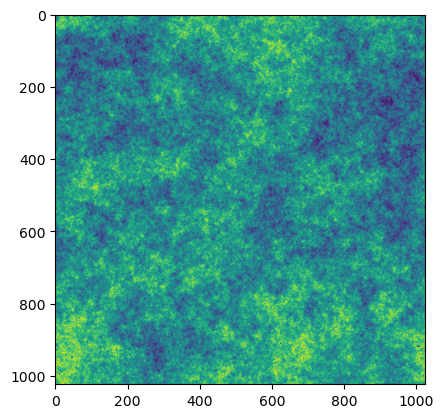

In [46]:
plt.imshow(texture[0])#+texture_slice[:,:,1]+ texture_slice[:,:,2])

In [79]:
# save in color
from PIL import Image

for i in range(0, n_textures, 3):
    texture_slice = np.stack([texture[i], texture[i+1], texture[i+2]], axis=-1)

    im = Image.fromarray(texture_slice.astype(np.uint8), mode = 'RGB')
    im.save(f"./textures/oneOverF_texture_colored_{amplitude_exponent}_{tex_size}_{i}.bmp")

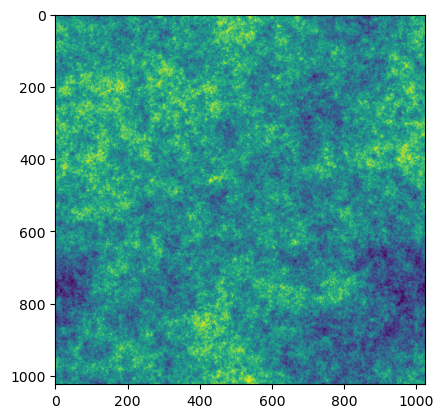

In [74]:
plt.imshow(texture_slice[:,:,0])#+texture_slice[:,:,1]+ texture_slice[:,:,2])

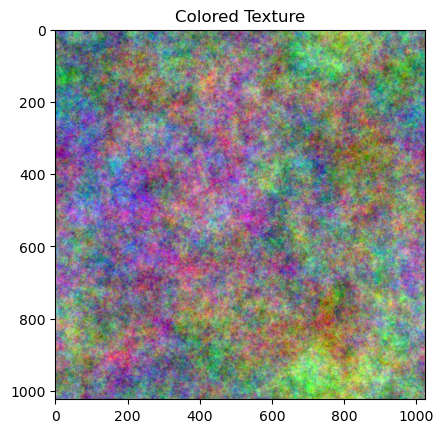

In [78]:
from PIL import Image
import matplotlib.pyplot as plt

# Example to load and display one image
image_path = f"oneOverF_texture_colored_{amplitude_exponent}_{tex_size}_0.bmp"
loaded_image = Image.open(image_path, mode = 'r')

# Display the image
plt.imshow(loaded_image)
plt.title("Colored Texture")
plt.show()


In [7]:
import imageio

for i in range(n_textures):
    out_path = f"textures/oneOverF_texture_{amplitude_exponent}_{tex_size}_{i}.bmp"
    imageio.imwrite(out_path, (texture[i]*255).astype(np.uint8))


In [8]:
(texture[i]*256).astype(np.uint8)

array([[  1,  58,  52, ..., 100,  67,  21],
       [  9,  71,  72, ...,  97,  74,  32],
       [ 48,  61,  80, ...,  61,  61,  60],
       ...,
       [109,  57,  47, ..., 116,  83, 139],
       [ 90,  61,  56, ...,  93,  99, 123],
       [ 41,  89,  61, ...,  86,  59,  74]], dtype=uint8)

## Smoothing
Simply multiply pictures with a cosine with half period of one degree

NameError: name 't2' is not defined

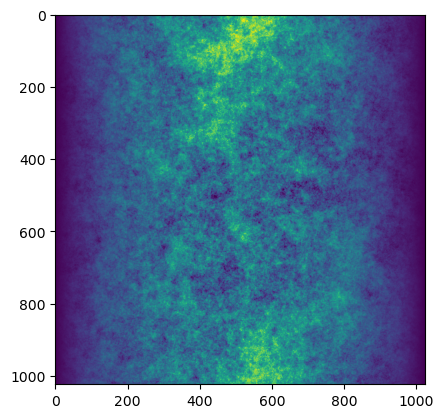

In [9]:
## todo
plt.imshow(texture[1] * np.cos(np.linspace(-np.pi/2, np.pi/2,1024)))

X,Y = np.meshgrid(np.linspace(-t2,t2,tex_size,endpoint=True),
                    np.linspace(-t2,t2,tex_size,endpoint=True))

In [13]:
# inspect
@widgets.interact(i = widgets.IntSlider(value=0, min=0, max=n_textures-1, step=1))

def plot_ims(i):
    fig, axs = plt.subplots(1, 2, figsize = (9, 18))
    axs[0].imshow(texture[i].T, cmap = 'gray')
    axs[1].imshow((texture[i] * np.cos(np.linspace(-np.pi/3, np.pi/3,1024))).T * np.cos(np.linspace(-np.pi/3, np.pi/3,1024)), cmap='gray')


interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

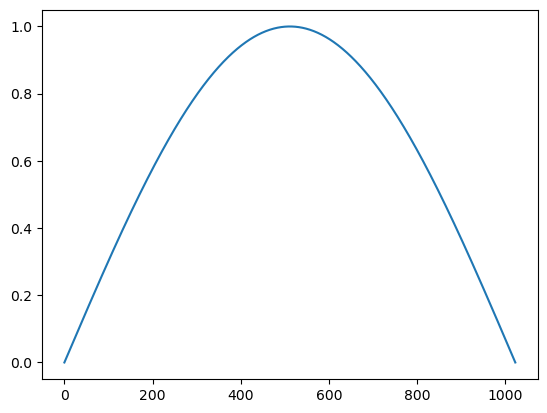

In [24]:
plt.plot(np.cos(np.linspace(-np.pi/2, np.pi/2,1024)))

## understanding the fixation task

Marco's version: he used the following setup where t
he dot would turn red about every 3.5 seconds with a but of randomness involved drawn from a uniform between $[-1, 1]$

In [36]:
dot_switch_color_times = np.arange(3, 360, float(3.5))
print(dot_switch_color_times)

# adding randomness
dot_switch_color_times += (2*np.random.rand(len(dot_switch_color_times))-1) # adding uniform noise [-1, 1]
dot_switch_color_times

[  3.    6.5  10.   13.5  17.   20.5  24.   27.5  31.   34.5  38.   41.5
  45.   48.5  52.   55.5  59.   62.5  66.   69.5  73.   76.5  80.   83.5
  87.   90.5  94.   97.5 101.  104.5 108.  111.5 115.  118.5 122.  125.5
 129.  132.5 136.  139.5 143.  146.5 150.  153.5 157.  160.5 164.  167.5
 171.  174.5 178.  181.5 185.  188.5 192.  195.5 199.  202.5 206.  209.5
 213.  216.5 220.  223.5 227.  230.5 234.  237.5 241.  244.5 248.  251.5
 255.  258.5 262.  265.5 269.  272.5 276.  279.5 283.  286.5 290.  293.5
 297.  300.5 304.  307.5 311.  314.5 318.  321.5 325.  328.5 332.  335.5
 339.  342.5 346.  349.5 353.  356.5]


array([  3.98810913,   6.25057815,   9.25880131,  12.74422166,
        16.39692177,  21.20331042,  24.7188825 ,  27.15255241,
        30.30215476,  35.09034648,  38.70892539,  40.76792207,
        44.67864442,  48.55185638,  52.91539281,  55.38613446,
        58.65996377,  62.78504019,  65.34350428,  69.95198466,
        73.96276759,  77.49275735,  80.2079901 ,  84.27096796,
        86.00437041,  90.49649255,  94.63356203,  98.08203934,
       100.23338885, 104.51184247, 107.29592796, 110.87608126,
       114.20821915, 119.00997554, 121.54871087, 124.75193393,
       128.183756  , 133.39616849, 136.94992789, 140.23236525,
       142.9887241 , 146.28241604, 149.12576277, 153.24586894,
       157.49736393, 160.37881242, 163.008326  , 168.19822687,
       171.91192623, 174.5112955 , 177.68691133, 182.11041536,
       184.63623999, 189.2215566 , 191.62144347, 195.34791592,
       199.66684685, 202.44024282, 206.81458749, 210.34449792,
       212.4677709 , 215.97663859, 219.91544176, 222.70

In [43]:
dot_switch_color_times
dot_switch_color_times_frames = (dot_switch_color_times*120).astype(int)
dot_switch_color_times_frames

array([  478,   750,  1111,  1529,  1967,  2544,  2966,  3258,  3636,
        4210,  4645,  4892,  5361,  5826,  6349,  6646,  7039,  7534,
        7841,  8394,  8875,  9299,  9624, 10112, 10320, 10859, 11356,
       11769, 12028, 12541, 12875, 13305, 13704, 14281, 14585, 14970,
       15382, 16007, 16433, 16827, 17158, 17553, 17895, 18389, 18899,
       19245, 19560, 20183, 20629, 20941, 21322, 21853, 22156, 22706,
       22994, 23441, 23960, 24292, 24817, 25241, 25496, 25917, 26389,
       26724, 27128, 27608, 27968, 28492, 28878, 29304, 29667, 30155,
       30594, 30957, 31435, 31785, 32166, 32694, 33033, 33438, 33914,
       34352, 34840, 35182, 35648, 35970, 36579, 36906, 37254, 37700,
       38217, 38686, 39076, 39357, 39760, 40146, 40710, 41122, 41468,
       41984, 42281, 42745])

In [49]:
# code to implement fixatiobn
# changes color when frame counter reaches a value in the dot_switch_color_times_frames array
# keep changed color for .8 ms, ie 96 frames
frame_counter=0
change_back_counter=0

color = 'black'
while frame_counter < 50000:
    if frame_counter in dot_switch_color_times_frames:
        print('change color to red')
        
        color = 'red'
        
        change_back_counter = 96 # keep red for 96 frames
        
    
    frame_counter+=1
    
    if change_back_counter != 0:
        change_back_counter -= 1
    else:
        if color != 'black':
            print('change color to black')
            
            color = 'black'

change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color to black
change color to red
change color t

(array([17., 10., 11., 11., 11.,  7.,  9.,  6.,  9., 11.]),
 array([-0.99049387, -0.79156102, -0.59262817, -0.39369532, -0.19476247,
         0.00417038,  0.20310324,  0.40203609,  0.60096894,  0.79990179,
         0.99883464]),
 <BarContainer object of 10 artists>)

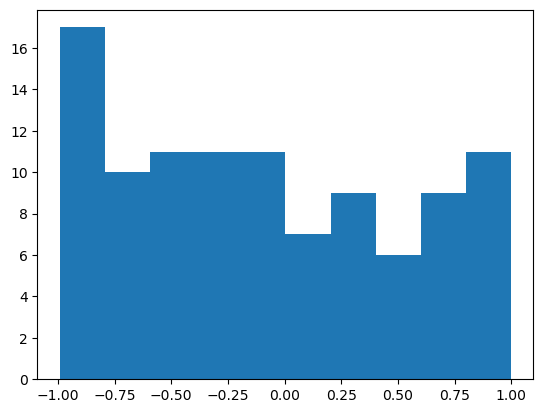

In [66]:
plt.hist(2*np.random.rand(len(dot_switch_color_times))-1)
# plt.hist(np.random.rand(len(dot_switch_color_times))-1)

# ITIs from Jurjen linexp

https://github.com/gjheij/LineExps/blob/main/sizeresponse/session.py

In [30]:

# iti function based on negative exponential
def _return_itis(mean_duration, minimal_duration, maximal_duration, n_trials):
    itis = np.random.exponential(scale=mean_duration-minimal_duration, size=n_trials)
    itis += minimal_duration
    itis[itis>maximal_duration] = maximal_duration
    return itis

def iterative_itis(mean_duration=6, minimal_duration=3, maximal_duration=18, n_trials=None, leeway=1, verbose=True):
    
    """
    looks for an iti set with the desired characteristics where 
    (itis.sum() < min_iti_duration) | (itis.sum() > max_iti_duration)
    """
    
    nits = 0
    itis = _return_itis(
        mean_duration=mean_duration,
        minimal_duration=minimal_duration,
        maximal_duration=maximal_duration,
        n_trials=n_trials)

    total_iti_duration = n_trials * mean_duration
    min_iti_duration = total_iti_duration - leeway
    max_iti_duration = total_iti_duration + leeway
    
    while (itis.sum() < min_iti_duration) | (itis.sum() > max_iti_duration):
        itis = _return_itis(
            mean_duration=mean_duration,
            minimal_duration=minimal_duration,
            maximal_duration=maximal_duration,
            n_trials=n_trials)
        nits += 1
#         print(nits)

    if verbose:
        print(f'ITIs created with total ITI duration of {round(itis.sum(),2)}s after {nits} iterations')    

    return itis    

(array([21.,  8.,  4.,  3.,  5.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.15222817,  1.84198092,  3.53173366,  5.22148641,  6.91123915,
         8.60099189, 10.29074464, 11.98049738, 13.67025013, 15.36000287,
        17.04975562]),
 <BarContainer object of 10 artists>)

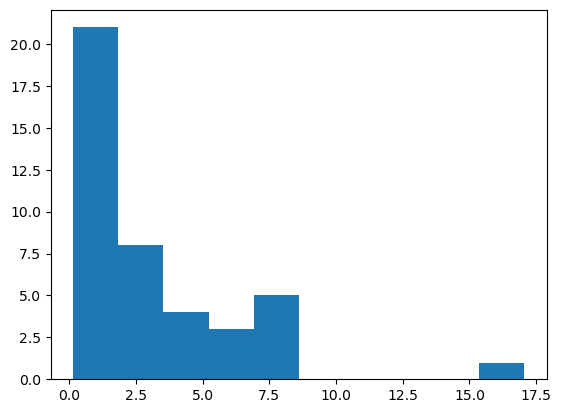

In [31]:
mean_duration=6
minimal_duration=3
maximal_duration=18
n_trials=5

exp_itis = np.random.exponential(scale=mean_duration-minimal_duration, size=3*14)
plt.hist(exp_itis)

ITIs created with total ITI duration of 209.81s after 16 iterations


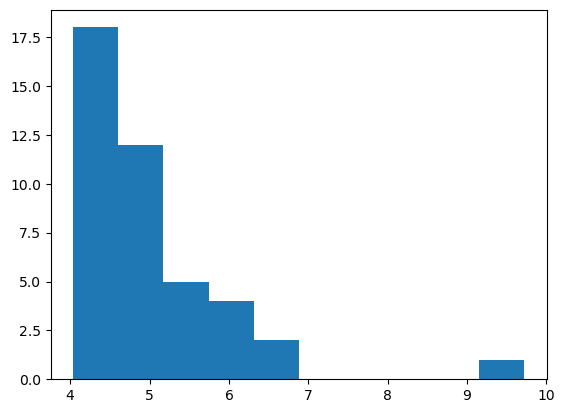

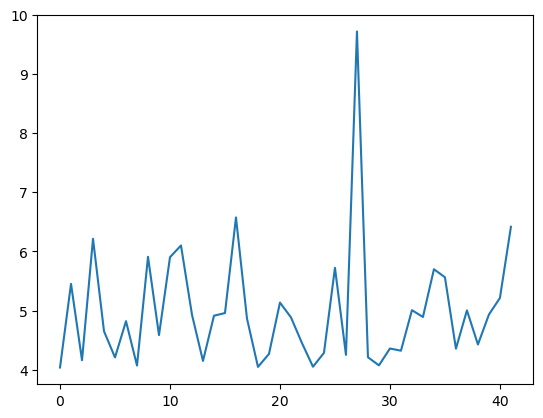

In [32]:
iterated_itis = iterative_itis(mean_duration=5, minimal_duration=4, maximal_duration=12, n_trials = 3*14, leeway = .5) # mean duration??
plt.hist(iterated_itis)
plt.show()
plt.clf()
plt.plot(iterated_itis)

In [33]:
iterated_itis

array([4.03844442, 5.45246556, 4.16104912, 6.21494405, 4.65092193,
       4.2084236 , 4.82141703, 4.07079948, 5.9096313 , 4.58603116,
       5.90329183, 6.10128402, 4.9298668 , 4.14913702, 4.91360881,
       4.95887525, 6.5751893 , 4.86644485, 4.04836637, 4.26780087,
       5.13580512, 4.88524552, 4.45095162, 4.05127197, 4.28533238,
       5.72387351, 4.25166314, 9.71968091, 4.21113539, 4.07431383,
       4.35926455, 4.3222371 , 5.00741963, 4.89253758, 5.69970257,
       5.56362862, 4.35684424, 5.00404639, 4.42711608, 4.93362132,
       5.21351469, 6.41752292])

In [34]:
300 * 120

36000

### Messing with the function

In [40]:
tex_size = 50
t2 = tex_size/2
X,Y = np.meshgrid(np.linspace(-t2,t2,tex_size,endpoint=True),
                    np.linspace(-t2,t2,tex_size,endpoint=True))
ecc = np.sqrt(X**2 + Y**2)


In [44]:
X.shape
Y.shape

(50, 50)

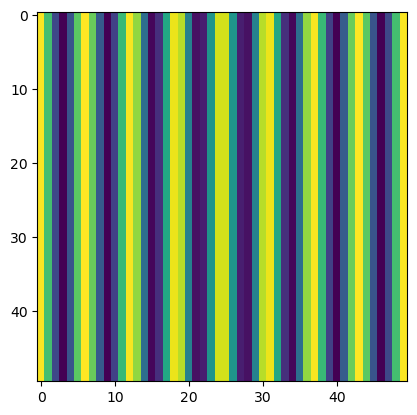

In [45]:
plt.imshow(ecc)
plt.imshow(np.cos(X))

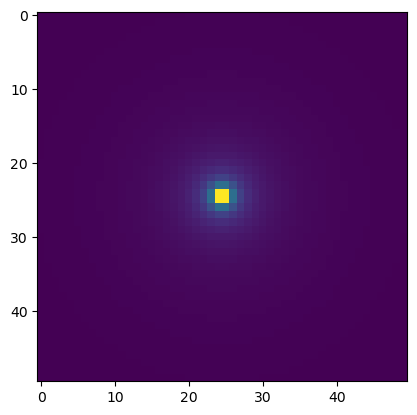

In [56]:
plt.imshow(ecc**-amplitude_exponent)

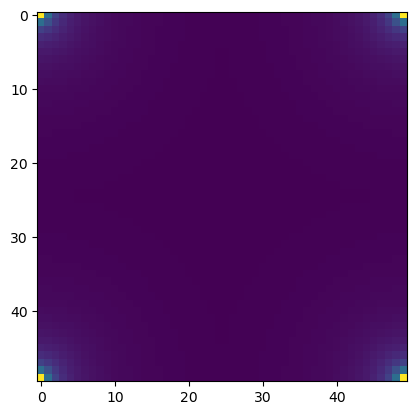

In [55]:
amplitude_exponent=1.25
ampl_spectrum = np.fft.fftshift(ecc**-amplitude_exponent, (0,1))
plt.imshow(ampl_spectrum)

In [59]:
phases = np.random.randn(n_textures, tex_size, tex_size) * 2 * np.pi
phases.shape



(100, 50, 50)

In [60]:
@widgets.interact(i = widgets.IntSlider(value=0, min=0, max=n_textures, step=1))

def plot_ims(i):
    plt.imshow(phases[i])

interactive(children=(IntSlider(value=0, description='i'), Output()), _dom_classes=('widget-interact',))

In [63]:
nt = 1
compl_f = ampl_spectrum * np.sin(phases[nt]) + 1j * ampl_spectrum * np.cos(phases[nt])
compl_f.shape

(50, 50)

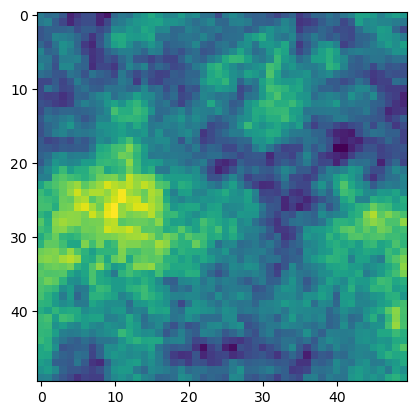

In [68]:
texture_ = np.fft.ifft2(compl_f).real
texture_.shape
plt.imshow(texture_)

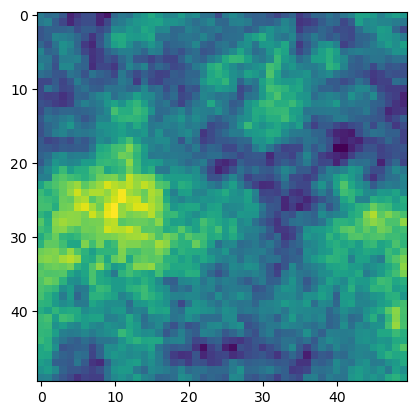

In [70]:
# scale and clip
texture_ /= texture_.std()*6.666
texture_ += 0.5
texture_[texture_<0] = 0
texture_[texture_>1] = 1

plt.imshow(texture_)